In [1]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import pylab
#import statsmodels.api as sm

## Data Format
The matlab data is formatted so that flash responses and beep responses are stored in separate matrices called accMatF for flash and accMatB for beep. The flash and beep combinations corresponding to the responses are also stored in separate matrices called mixtrF for flash and mixtrB for beep. We will separate the data based on the type of response the participant gave, and from there we can subset by congruent or unisensory.

In [12]:
datapath = 'ExpData/*.mat'
datafiles = np.array(glob.glob(datapath))
print(datafiles)

['ExpData\\axa_BEEPFLASH_1_28_10_0.mat'
 'ExpData\\axt_FLASHBEEP_1_22_10_46.mat'
 'ExpData\\axv_BEEPFLASH_2_26_11_11.mat'
 'ExpData\\cxp_BEEPFLASH_2_26_10_4.mat'
 'ExpData\\fxi_FLASHBEEP_1_29_10_8.mat'
 'ExpData\\lxs_BEEPFLASH_2_5_15_5.mat'
 'ExpData\\sxy_FLASHBEEP_1_23_12_33.mat'
 'ExpData\\zxg_FLASHBEEP_1_28_12_33.mat']


In [3]:
flashdata = np.empty((1,5))
beepdata = np.empty((1,5))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

### We will store the data in Pandas dataframes to make subsetting and extracting columns/rows easier:
Column 1: Subject ID <br>
Column 2: Number of flashes presented <br>
Column 3: Number of beeps presented <br>
Column 4: Accuracy of response <br>
Column 5: Response time 

In [4]:
flashframe = pd.DataFrame(flashdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])
beepframe = pd.DataFrame(beepdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])

In [5]:
congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

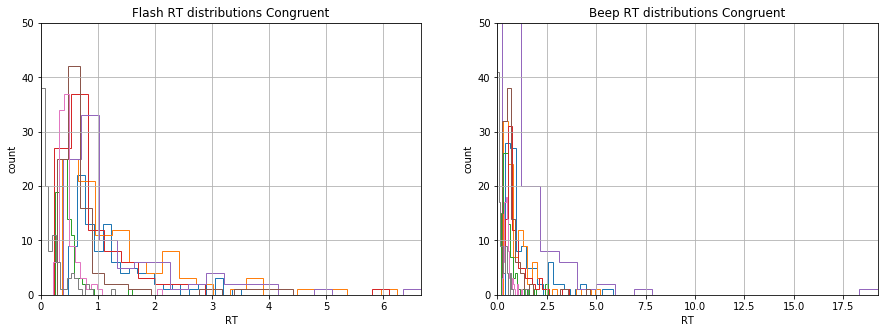

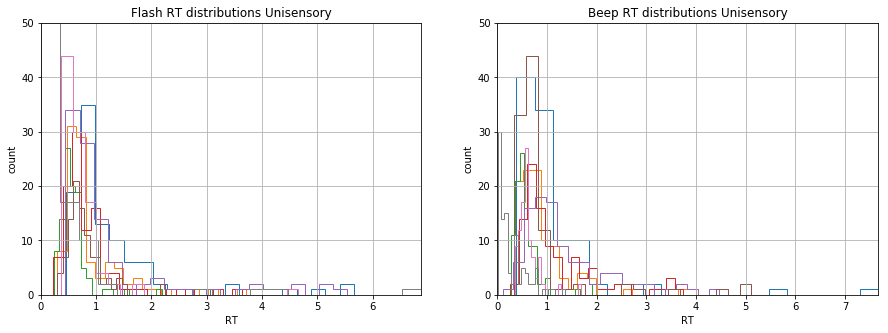

In [6]:
congrfig = plt.figure(figsize=(15, 5))
ax = congrfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
ax.set_xlim([0, max(congrf['rt'])])
ax.set_ylim([0, 50])
for i, subj_data in congrf.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = congrfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
ax.set_xlim([0, max(congrb['rt'])])
ax.set_ylim([0, 50])
for i, subj_data in congrb.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
unifig = plt.figure(figsize=(15, 5))
ax = unifig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
ax.set_xlim([0, max(unif['rt'])])
ax.set_ylim([0, 50])
for i, subj_data in unif.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = unifig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
ax.set_xlim([0, max(unib['rt'])])
ax.set_ylim([0, 50])
for i, subj_data in unib.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

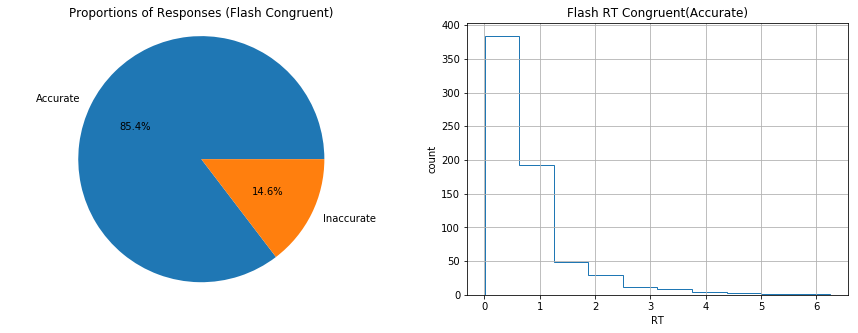

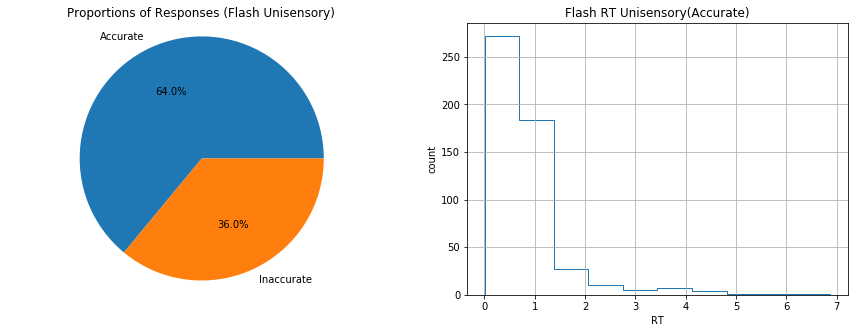

In [7]:
sizes = [congrf['acc'].value_counts()[1], congrf['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, title='Proportions of Responses (Flash Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT Congruent(Accurate)')
#for i, subj_data in congf.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congrf.loc[congrf['acc'] == 1].rt.hist(histtype='step', ax = ax)


#print(unifdata['response'].value_counts())
sizes = [unif['acc'].value_counts()[1], unif['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig3 = plt.figure(figsize=(15, 5))
ax = fig3.add_subplot(121, title='Proportions of Responses (Flash Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig3.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT Unisensory(Accurate)')
#for i, subj_data in unif.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
unif.loc[unif['acc'] == 1].rt.hist(histtype='step', ax = ax)

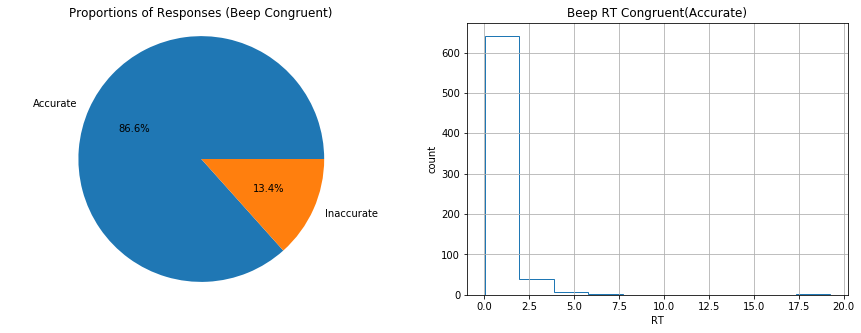

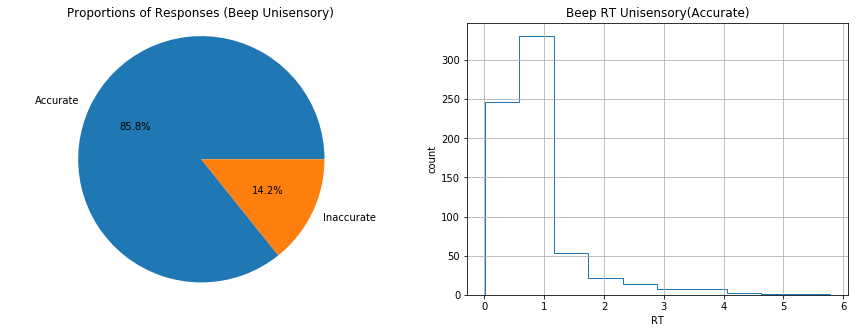

In [8]:
sizes = [congrb['acc'].value_counts()[1], congrb['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig5 = plt.figure(figsize=(15, 5))
ax = fig5.add_subplot(121, title='Proportions of Responses (Beep Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig5.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT Congruent(Accurate)')
#for i, subj_data in congb.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congrb.loc[congrb['acc'] == 1].rt.hist(histtype='step', ax = ax)    
    
#print(unibdata['response'].value_counts())
sizes = [unib['acc'].value_counts()[1], unib['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig7 = plt.figure(figsize=(15, 5))
ax = fig7.add_subplot(121, title='Proportions of Responses (Beep Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig7.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT Unisensory(Accurate)')
#for i, subj_data in unib.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['acc'] == 1].rt.hist(histtype='step', ax = ax)

In [9]:
### Calculate standard error for each condition(flash response)
def calcstderr(data, col):
    num = float(0)
    count = 0
    for i, subj_data in data.groupby('subj_idx'):
        num += subj_data[col].std()
        count += 1
    return(num/count)

In [10]:
# if subject id is not given, plot the means including std
def plotbars(flashuni, beepuni, flashcongr, beepcongr, title1, title2, subjid = 0):
    if (subjid != 0):
        flashuni = flashuni.loc[flashuni['subj_idx'] == subjid]
        beepuni = beepuni.loc[beepuni['subj_idx'] == subjid]
        flashcongr = flashcongr.loc[flashcongr['subj_idx'] == subjid]
        beepcongr = beepcongr.loc[beepcongr['subj_idx'] == subjid]
        
    fig = plt.figure(figsize=(15,5)) 
    ## % correct plot
    flashuniacc = flashuni['acc'].mean()
    beepuniacc = beepuni['acc'].mean()
    flashcongracc = flashcongr['acc'].mean()
    beepcongracc = beepcongr['acc'].mean()
    allcongracc = (flashcongracc + beepcongracc) / 2
    
    ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title=title1)
    objects = ('Flash Uni', 'Beep Uni', 'Both Congr', 'Flash Congr', 'Beep Congr')
    y_pos = np.arange(len(objects))
    performance = [flashuniacc, beepuniacc, allcongracc, flashcongracc, beepcongracc]

    if(subjid == 0):
        flashuniaccerr = calcstderr(flashuni, 'acc')
        beepuniaccerr = calcstderr(beepuni, 'acc')
        flashcongraccerr = calcstderr(flashcongr, 'acc')
        beepcongraccerr = calcstderr(beepcongr, 'acc')
        allcongraccerr = (flashcongraccerr + beepcongraccerr) / 2
        plt.bar(y_pos, performance, yerr=[flashuniaccerr, beepuniaccerr, allcongraccerr, flashcongraccerr, beepcongraccerr], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
        
    plt.xticks(y_pos, objects)
    plt.ylim([0,1])
    
    ## mean rt plot, only want accurate trials
    flashunirt = flashuni.loc[flashuni['acc'] == 1]['rt'].mean()
    beepunirt = beepuni.loc[beepuni['acc'] == 1]['rt'].mean()
    flashcongrrt = flashcongr.loc[flashcongr['acc'] == 1]['rt'].mean()
    beepcongrrt = beepcongr.loc[beepcongr['acc'] == 1]['rt'].mean()
    allcongrrt = (flashcongrrt + beepcongrrt) / 2
    
    ax = fig.add_subplot(122, xlabel='condition', ylabel='mean rt', title=title2)
    objects = ('Flash Uni', 'Beep Uni', 'Both Congr', 'Flash Congr', 'Beep Congr')
    y_pos = np.arange(len(objects))
    performance = [flashunirt, beepunirt, allcongrrt, flashcongrrt, beepcongrrt]

    if (subjid == 0):
        flashunirterr = calcstderr(flashuni, 'rt')
        beepunirterr = calcstderr(beepuni, 'rt')
        flashcongrrterr = calcstderr(flashcongr, 'rt')
        beepcongrrterr = calcstderr(beepcongr, 'rt')
        allcongrrterr = (flashcongrrterr + beepcongrrterr) / 2
        plt.bar(y_pos, performance, yerr=[flashunirterr, beepunirterr, allcongrrterr, flashcongrrterr, beepcongrrterr], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
        
    plt.xticks(y_pos, objects)
    plt.ylim([0,2])

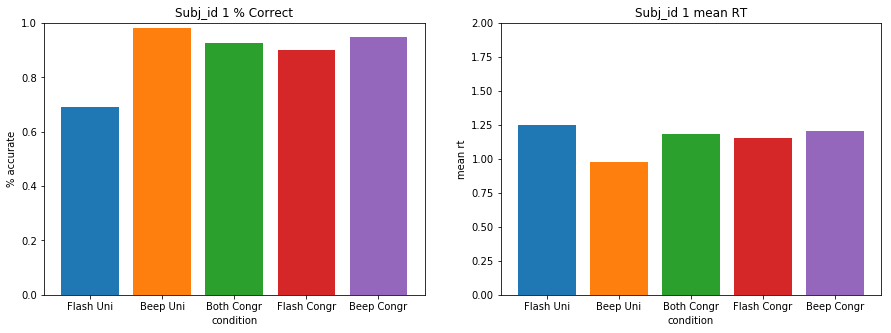

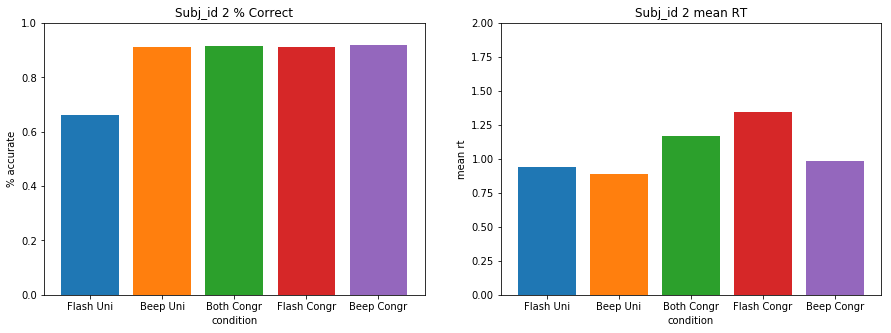

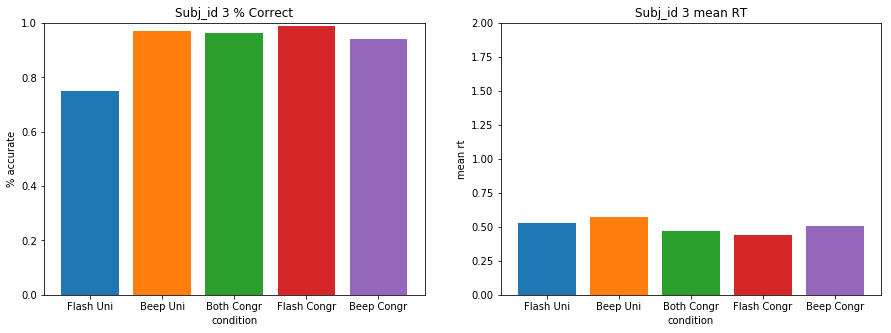

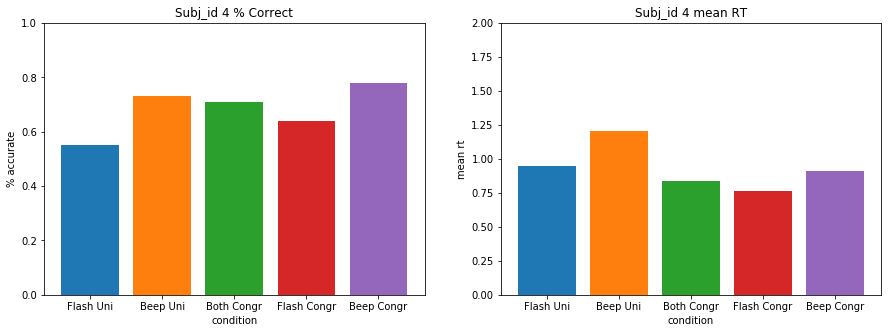

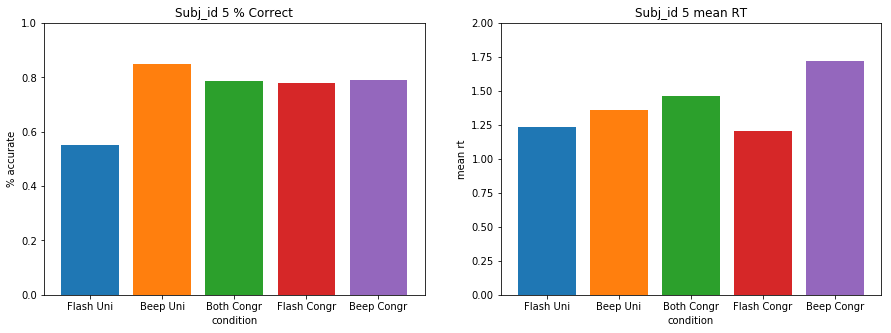

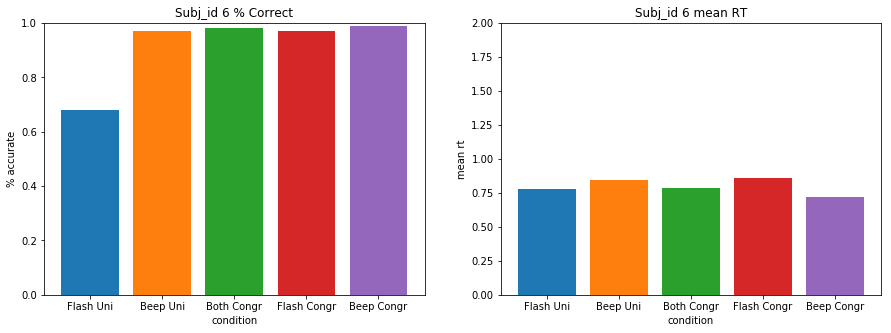

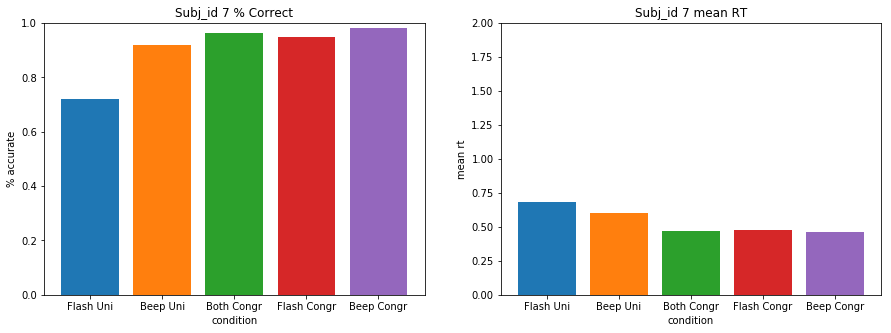

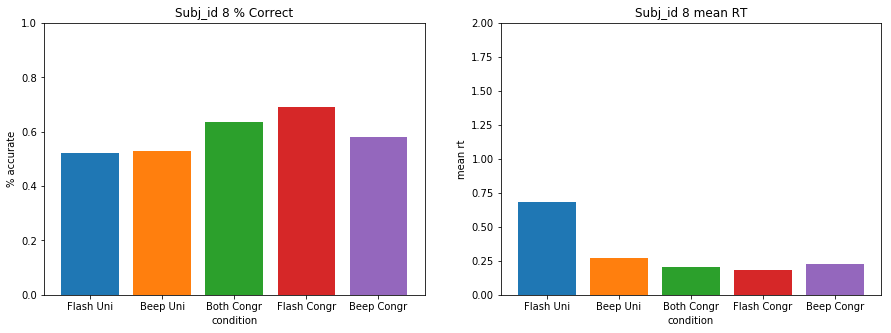

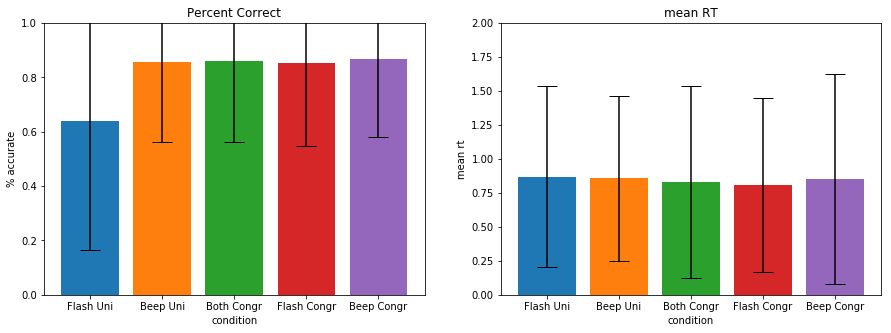

In [14]:
plotbars(unif, unib, congrf, congrb, "Subj_id 1 % Correct", "Subj_id 1 mean RT", 1)
plotbars(unif, unib, congrf, congrb, "Subj_id 2 % Correct", "Subj_id 2 mean RT", 2)
plotbars(unif, unib, congrf, congrb, "Subj_id 3 % Correct", "Subj_id 3 mean RT", 3)
plotbars(unif, unib, congrf, congrb, "Subj_id 4 % Correct", "Subj_id 4 mean RT", 4)
plotbars(unif, unib, congrf, congrb, "Subj_id 5 % Correct", "Subj_id 5 mean RT", 5)
plotbars(unif, unib, congrf, congrb, "Subj_id 6 % Correct", "Subj_id 6 mean RT", 6)
plotbars(unif, unib, congrf, congrb, "Subj_id 7 % Correct", "Subj_id 7 mean RT", 7)
plotbars(unif, unib, congrf, congrb, "Subj_id 8 % Correct", "Subj_id 8 mean RT", 8)

plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")

### We want to drop rows where rt is less than 50ms(0.05 seconds) or more than 10 seconds
Lets also drop subj 8 as their parameters are nonconvergent

In [15]:
def droprow(df, val, less=True):
    if(less):
        return(df.drop(df.index[df['rt'] < val].tolist(), axis=0))
    else:
        return(df.drop(df.index[df['rt'] > val].tolist(), axis=0))
    
def dropsubj(df, val):
    return(df.drop(df.index[df['subj_idx'] == val].tolist(), axis=0))

flashframe = droprow(flashframe, 0.05)
flashframe = dropsubj(flashframe, 8)
flashframe = droprow(flashframe, 10, False)
beepframe = droprow(beepframe, 0.05)
beepframe = dropsubj(beepframe, 8)
beepframe = droprow(beepframe, 10, False)

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

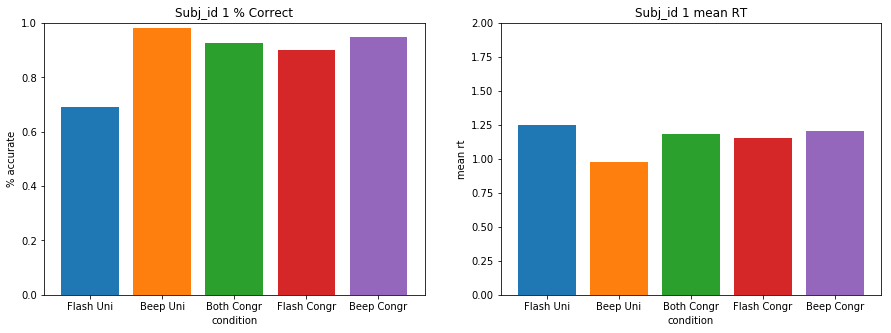

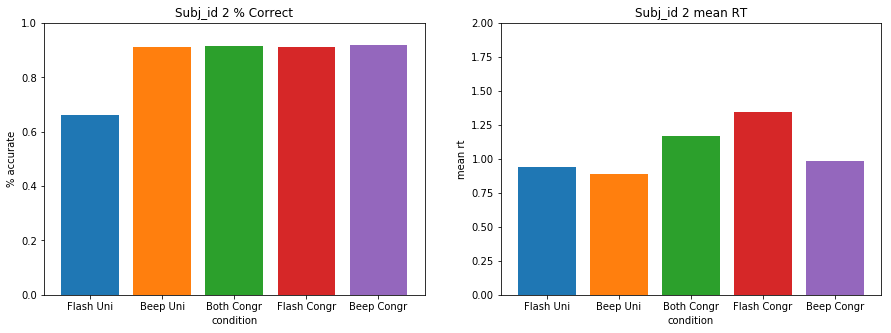

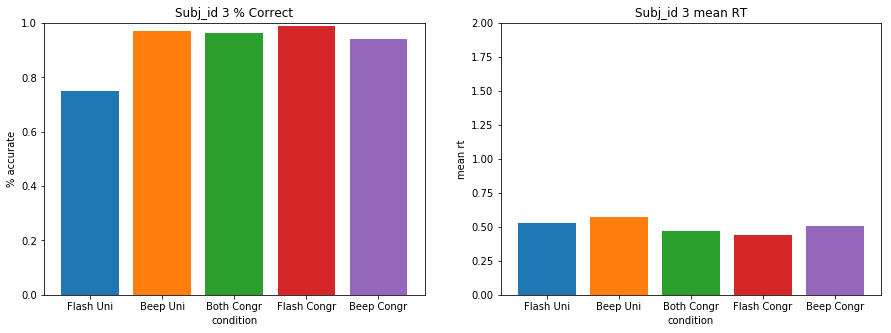

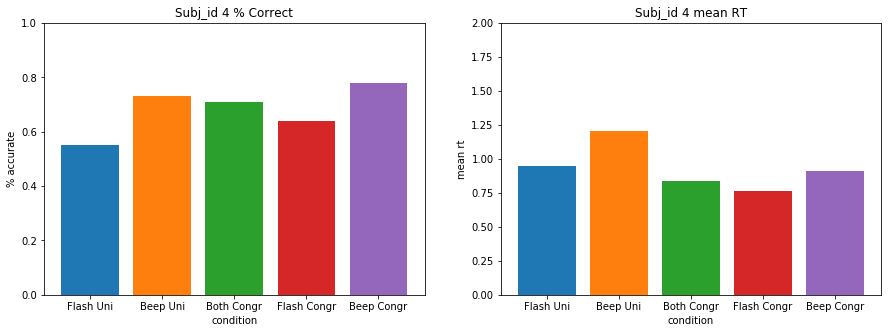

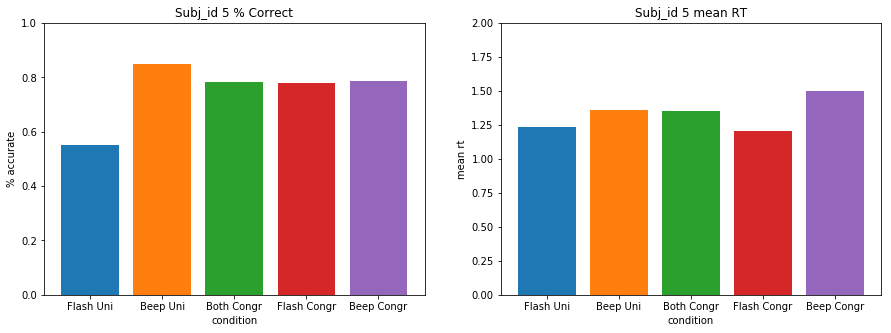

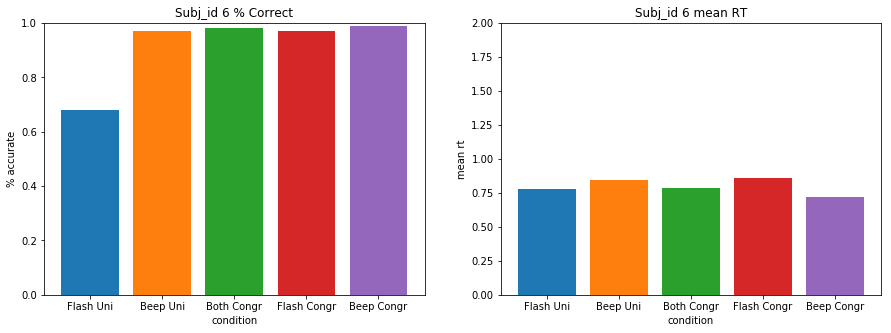

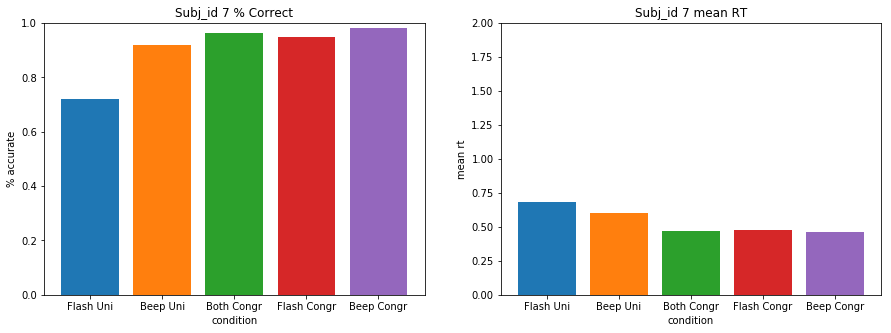

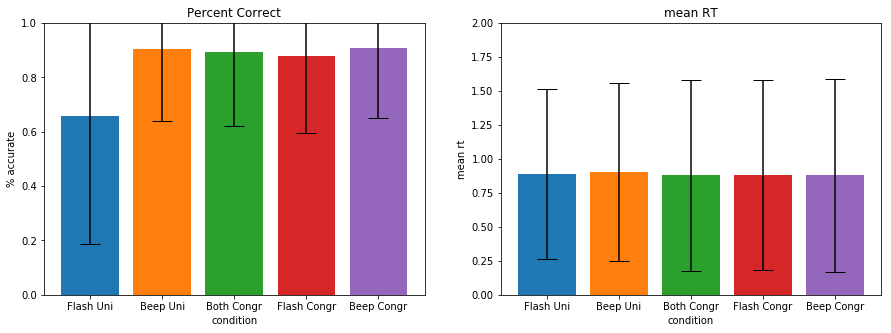

In [16]:
plotbars(unif, unib, congrf, congrb, "Subj_id 1 % Correct", "Subj_id 1 mean RT", 1)
plotbars(unif, unib, congrf, congrb, "Subj_id 2 % Correct", "Subj_id 2 mean RT", 2)
plotbars(unif, unib, congrf, congrb, "Subj_id 3 % Correct", "Subj_id 3 mean RT", 3)
plotbars(unif, unib, congrf, congrb, "Subj_id 4 % Correct", "Subj_id 4 mean RT", 4)
plotbars(unif, unib, congrf, congrb, "Subj_id 5 % Correct", "Subj_id 5 mean RT", 5)
plotbars(unif, unib, congrf, congrb, "Subj_id 6 % Correct", "Subj_id 6 mean RT", 6)
plotbars(unif, unib, congrf, congrb, "Subj_id 7 % Correct", "Subj_id 7 mean RT", 7)
plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")

## Between Subjects Model

In [17]:
import hddm

C:\Users\Edwin\Anaconda3\envs\py2\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [18]:
alldata = pd.concat([flashframe, beepframe])
alldata.columns = ['subj_idx', 'flashpres', 'beeppres', 'response', 'rt']
conditions = [(alldata['flashpres'] == 0) & (alldata['beeppres'] == 2), 
              (alldata['flashpres'] == 0) & (alldata['beeppres'] == 3),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 2),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 3),]
choices = ['A2', 'A3', 'V2', 'V3', 'A2V2', 'A3V3']
alldata['stimName'] = np.select(conditions, choices)
#alldata

With the presence of outliers it is important to include the p_outlier parameter in the model to aid convergence
Use stimulus coded model if there is a bias in responses when running the accuracy coded model

Response times lower than 50ms and greater than 10 seconds can be safely trimmed due to not making perceptual sense

In [19]:
def formatmodeldata(df, conditions, choices):
    dframe = df.copy()
    dframe.columns = ['subj_idx', 'flashpres', 'beeppres', 'response', 'rt']
    dframe['stimName'] = np.select(conditions, choices)
    return(dframe)
    

model_unif = formatmodeldata(unif, [(unif['flashpres'] == 2), (unif['flashpres'] == 3)], ['F2', 'F3'])
model_unib = formatmodeldata(unib, [(unib['beeppres'] == 2), (unib['beeppres'] == 3)], ['B2', 'B3'])
model_congrf = formatmodeldata(congrf, [(congrf['flashpres'] == 2) & (congrf['beeppres'] == 2),
                                        (congrf['flashpres'] == 3) & (congrf['beeppres'] == 3)], ['F2B2', 'F3B3'])
model_congrb = formatmodeldata(congrb, [(congrb['flashpres'] == 2) & (congrb['beeppres'] == 2),
                                        (congrb['flashpres'] == 3) & (congrb['beeppres'] == 3)], ['F2B2', 'F3B3'])

In [20]:
# 0 means responded 2, 1 means responded 3
def stimcode(df, conditions, choices):
    dframe = df.copy()
    dframe['stimCode'] = np.select(conditions, choices)
    return(dframe)

stim_unif = stimcode(model_unif, [(model_unif['flashpres'] == 2) & (model_unif['response'] == 0), 
                                  (model_unif['flashpres'] == 2) & (model_unif['response'] == 1),
                                  (model_unif['flashpres'] == 3) & (model_unif['response'] == 0),
                                  (model_unif['flashpres'] == 3) & (model_unif['response'] == 1)], [1, 0, 0, 1])
stim_congrf = stimcode(model_congrf, [(model_congrf['flashpres'] == 2) & (model_congrf['response'] == 0), 
                                      (model_congrf['flashpres'] == 2) & (model_congrf['response'] == 1),
                                      (model_congrf['flashpres'] == 3) & (model_congrf['response'] == 0),
                                      (model_congrf['flashpres'] == 3) & (model_congrf['response'] == 1)], [1, 0, 0, 1])
stim_unib = stimcode(model_unib, [(model_unib['beeppres'] == 2) & (model_unib['response'] == 0), 
                                  (model_unib['beeppres'] == 2) & (model_unib['response'] == 1),
                                  (model_unib['beeppres'] == 3) & (model_unib['response'] == 0),
                                  (model_unib['beeppres'] == 3) & (model_unib['response'] == 1)], [1, 0, 0, 1])
stim_congrb = stimcode(model_congrb, [(model_congrb['beeppres'] == 2) & (model_congrb['response'] == 0), 
                                      (model_congrb['beeppres'] == 2) & (model_congrb['response'] == 1),
                                      (model_congrb['beeppres'] == 3) & (model_congrb['response'] == 0),
                                      (model_congrb['beeppres'] == 3) & (model_congrb['response'] == 1)], [1, 0, 0, 1])

## (Converged) Accuracy coded model for unisensory flash responses

In [21]:
unif_acc_z = hddm.HDDM(model_unif, include=['a', 'v', 'z', 't', 'p_outlier'])
#unif_acc_z.find_starting_values()
unif_acc_z.sample(10000, burn=1000)

'''
unif_stim = hddm.HDDM(model_unif, include=['a', 'v', 't'])
unif_stim.find_starting_values()
unif_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 237.6 sec

"\nunif_stim = hddm.HDDM(model_unif, include=['a', 'v', 't'])\nunif_stim.find_starting_values()\nunif_stim.sample(10000, burn=1000)\n"

In [22]:
unif_acc_z.print_stats()
#unif_stim.print_stats()

                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a           1.428337  0.090070  1.282060  1.373229  1.418833  1.470920  1.627515  0.001825
a_std       0.182313  0.107653  0.038173  0.114836  0.162598  0.226616  0.436110  0.003662
a_subj.1.0  1.630555  0.141444  1.377099  1.521671  1.633230  1.732830  1.906071  0.005574
a_subj.2.0  1.464386  0.081984  1.320421  1.406736  1.459531  1.517407  1.637304  0.001791
a_subj.3.0  1.316132  0.067548  1.191003  1.269181  1.315535  1.361175  1.453222  0.001372
a_subj.4.0  1.407049  0.079728  1.263963  1.353161  1.402102  1.458181  1.576143  0.001578
a_subj.5.0  1.422010  0.078682  1.279860  1.368385  1.417280  1.469927  1.592466  0.001514
a_subj.6.0  1.446781  0.076073  1.310563  1.393482  1.442059  1.495099  1.607355  0.001479
a_subj.7.0  1.241801  0.070524  1.112108  1.192289  1.239008  1.288720  1.385515  0.002099
v           0.639320  0.160622  0.336141  0.547531  0.636614  0.726756  0.969150  0.003858

Plotting a
Plotting a_std
Plotting v
Plotting t


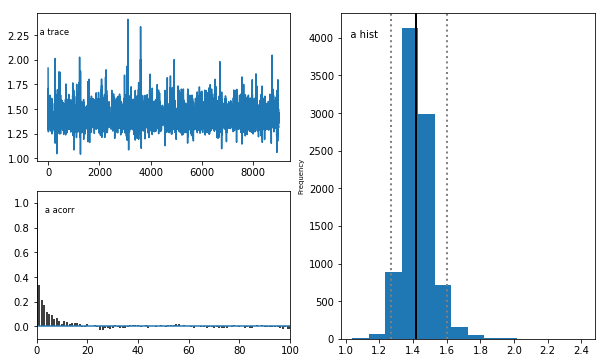

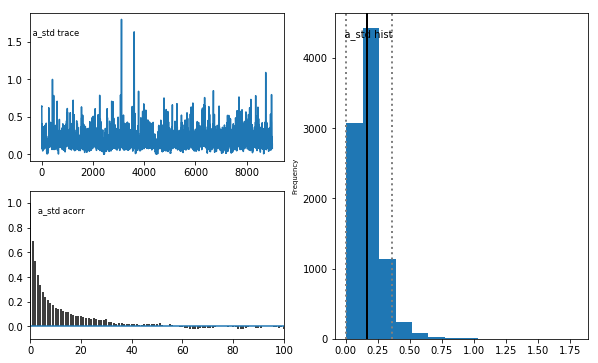

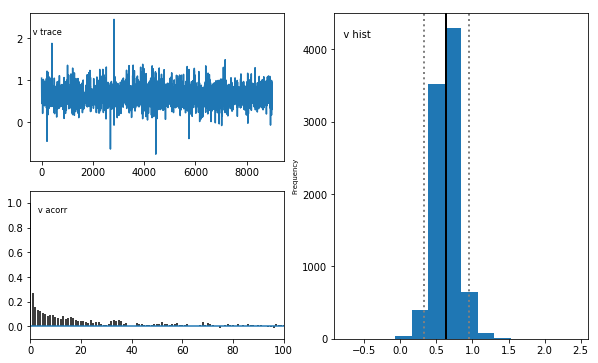

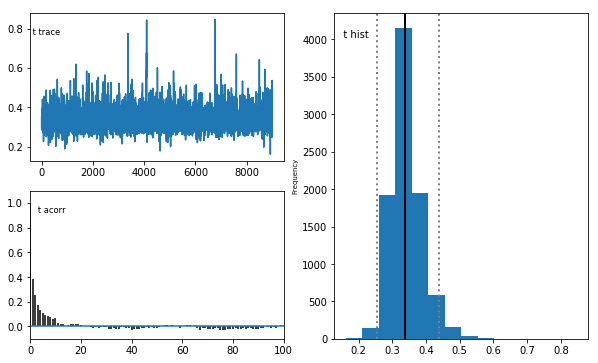

In [23]:
unif_acc_z.plot_posteriors(['a', 't', 'v', 'a_std'])

## (Failed) Accuracy coded model for congruent bisensory flash responses

In [24]:
congrf_acc_z = hddm.HDDM(model_congrf, include=['a', 'v', 'z', 't', 'p_outlier'])
#congrf_acc_z.find_starting_values()
congrf_acc_z.sample(10000, burn=1000)

'''
congrf_stim = hddm.HDDM(model_congrf, include=['a', 'v', 't'])
congrf_stim.find_starting_values()
congrf_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 232.2 sec

"\ncongrf_stim = hddm.HDDM(model_congrf, include=['a', 'v', 't'])\ncongrf_stim.find_starting_values()\ncongrf_stim.sample(10000, burn=1000)\n"

In [25]:
congrf_acc_z.print_stats()
#congrf_stim.print_stats()

                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a           2.054615  0.226335  1.638357  1.908707  2.040292  2.182509  2.541781  0.005613
a_std       0.528483  0.240514  0.211945  0.370259  0.478375  0.630513  1.136033  0.006617
a_subj.1.0  2.284617  0.194632  1.969994  2.150355  2.261954  2.392678  2.729544  0.005546
a_subj.2.0  2.490003  0.197163  2.155585  2.354414  2.472768  2.608785  2.919349  0.004474
a_subj.3.0  2.001829  0.339420  1.432107  1.760021  1.967947  2.204358  2.771359  0.017304
a_subj.4.0  1.684181  0.097825  1.489625  1.618732  1.685408  1.749942  1.875456  0.002454
a_subj.5.0  2.114264  0.127635  1.873027  2.027002  2.111638  2.196594  2.376847  0.002032
a_subj.6.0  2.272652  0.340507  1.764268  2.037612  2.215866  2.458559  3.141132  0.014055
a_subj.7.0  1.503504  0.272168  1.181327  1.333152  1.431102  1.578235  2.296976  0.016574
v           1.725447  0.591573  0.560673  1.362691  1.715895  2.077342  2.942751  0.009025

Plotting a
Plotting a_std
Plotting v
Plotting t


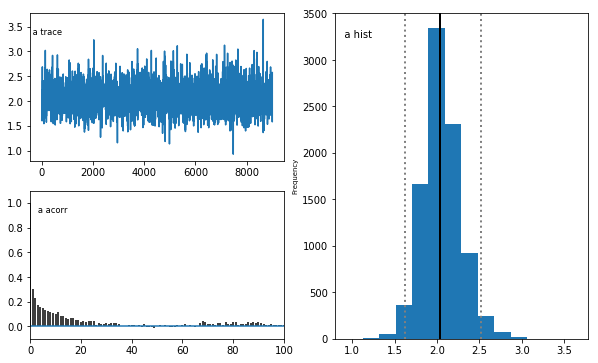

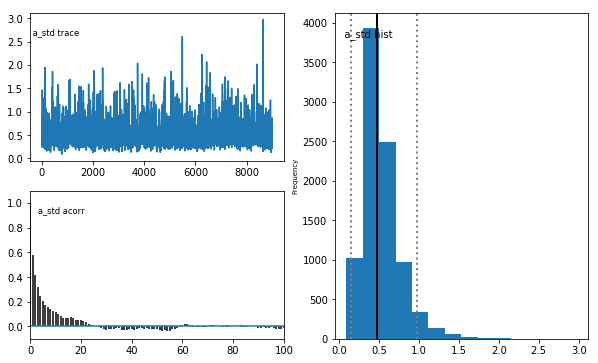

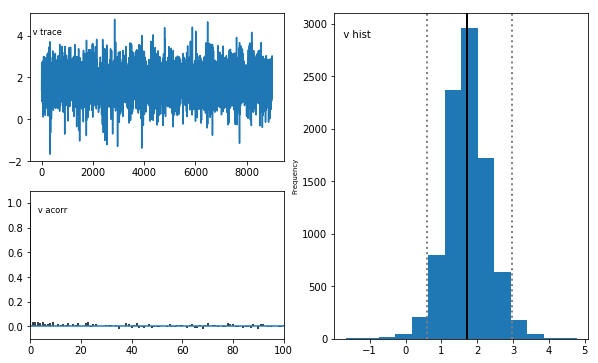

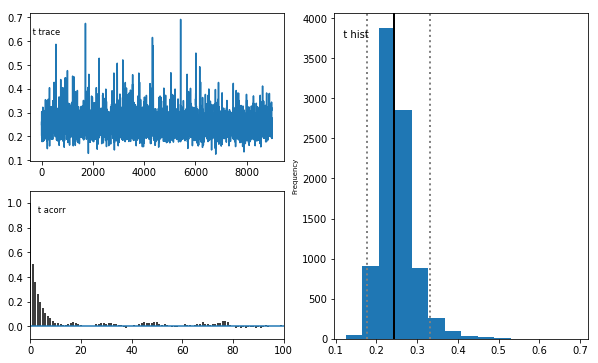

In [26]:
congrf_acc_z.plot_posteriors(['a', 't', 'v', 'a_std'])

## (Questionable) Accuracy coded model for unisensory beep responses

In [27]:
unib_acc_z = hddm.HDDM(model_unib, include=['a', 'z', 'v', 't', 'p_outlier'])
#unib_acc_z.find_starting_values()
unib_acc_z.sample(10000, burn=1000)

'''
unib_stim = hddm.HDDM(model_unib, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])
unib_stim.find_starting_values()
unib_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10001 of 10000 complete in 227.7 sec

"\nunib_stim = hddm.HDDM(model_unib, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])\nunib_stim.find_starting_values()\nunib_stim.sample(10000, burn=1000)\n"

In [28]:
unib_acc_z.print_stats()
#unib_stim.print_stats()

                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a           2.159417  0.208580  1.785342  2.024262  2.143321  2.276838  2.626464  0.007636
a_std       0.441798  0.210050  0.162502  0.301150  0.400149  0.533672  0.978600  0.007072
a_subj.1.0  2.620954  0.273643  2.157849  2.425517  2.596037  2.798124  3.213714  0.011304
a_subj.2.0  1.925361  0.130947  1.692170  1.834956  1.917932  2.005536  2.204676  0.003356
a_subj.3.0  1.917281  0.243075  1.542635  1.747162  1.886688  2.048646  2.472439  0.010906
a_subj.4.0  1.942416  0.113613  1.723042  1.863846  1.941565  2.020397  2.167308  0.002918
a_subj.5.0  2.367159  0.135211  2.118087  2.273840  2.362446  2.453739  2.643935  0.003012
a_subj.6.0  2.378473  0.319554  1.855761  2.157611  2.343961  2.557069  3.107268  0.013426
a_subj.7.0  1.989437  0.424661  1.412772  1.663312  1.889861  2.244809  2.975097  0.028187
v           1.939368  0.506229  0.964638  1.630442  1.920235  2.235560  2.996475  0.011036

Plotting a
Plotting a_std
Plotting v
Plotting t


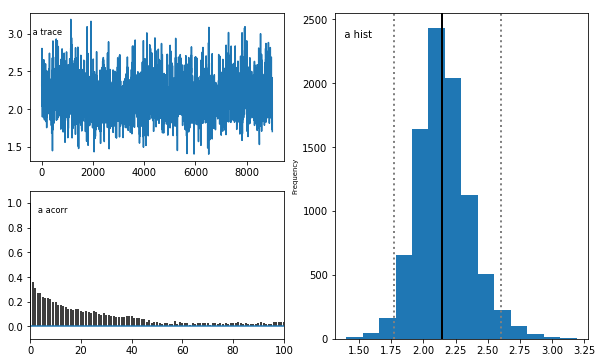

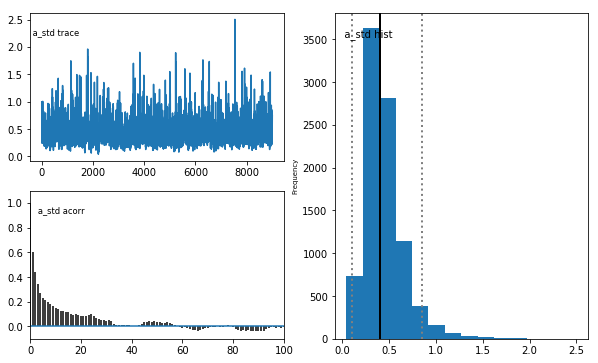

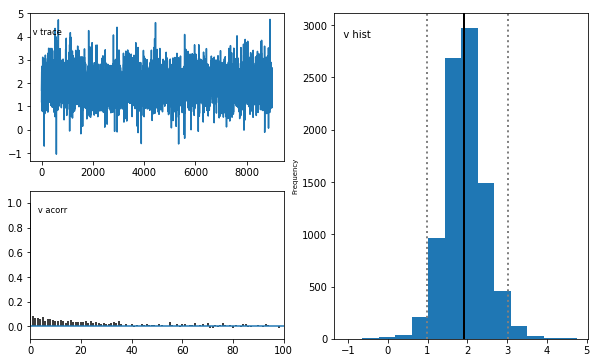

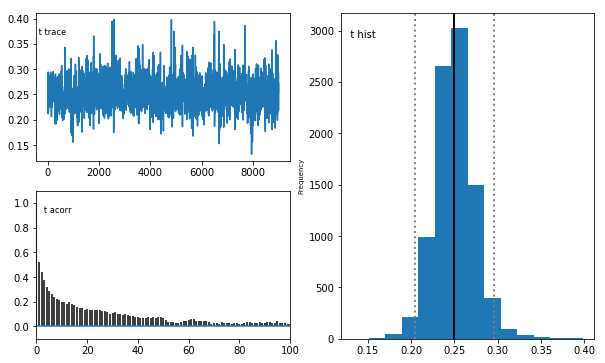

In [29]:
unib_acc_z.plot_posteriors(['a', 't', 'v', 'a_std'])
#unib_stim.plot_posteriors(['a', 't', 'v', 'a_std'])

## (Failed) Accuracy coded model for congruent bisensory beep responses

In [30]:
congrb_acc_z = hddm.HDDM(model_congrb, include=['a', 'z', 'v', 't', 'p_outlier'])
#congrb_stim_z.find_starting_values()
congrb_acc_z.sample(10000, burn=1000)

'''
congrb_stim = hddm.HDDM(model_congrb, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])
congrb_stim.find_starting_values()
congrb_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 237.7 sec

"\ncongrb_stim = hddm.HDDM(model_congrb, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])\ncongrb_stim.find_starting_values()\ncongrb_stim.sample(10000, burn=1000)\n"

In [31]:
congrb_acc_z.print_stats()
#congrb_stim.print_stats()

                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a           2.318118  0.212948  1.950138  2.183047  2.297406  2.427522  2.807206  0.007573
a_std       0.424187  0.236225  0.095927  0.268784  0.380825  0.523410  1.028989  0.010483
a_subj.1.0  2.723213  0.292770  2.201555  2.517871  2.706980  2.910921  3.318985  0.012886
a_subj.2.0  2.178865  0.165099  1.880077  2.066761  2.170095  2.281036  2.535209  0.004619
a_subj.3.0  2.150565  0.341268  1.552358  1.912406  2.138189  2.347521  2.941211  0.017664
a_subj.4.0  1.962828  0.124622  1.715918  1.876871  1.961066  2.047187  2.212438  0.003441
a_subj.5.0  2.246851  0.122295  2.019030  2.164499  2.241031  2.325076  2.503408  0.002475
a_subj.6.0  2.434969  0.305884  1.976803  2.224602  2.388054  2.588501  3.200340  0.015715
a_subj.7.0  2.568326  0.391083  2.015796  2.298328  2.504758  2.755465  3.521416  0.021032
v           1.902177  0.555410  0.839327  1.551427  1.895928  2.232291  3.071380  0.009529

Plotting a
Plotting a_std
Plotting v
Plotting t


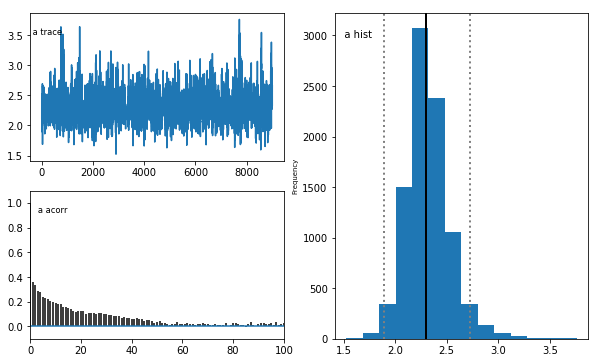

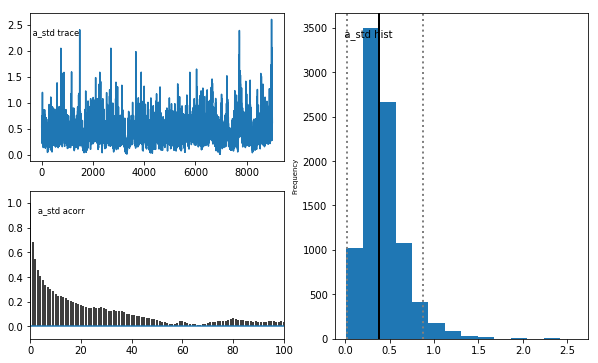

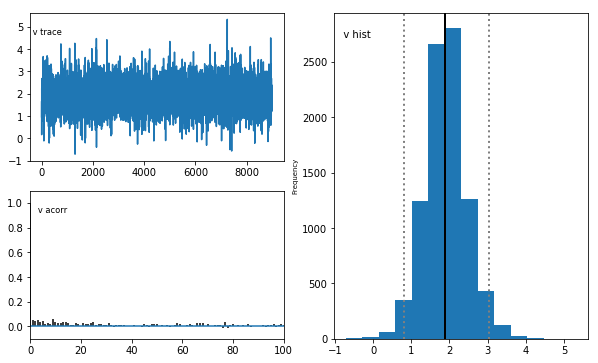

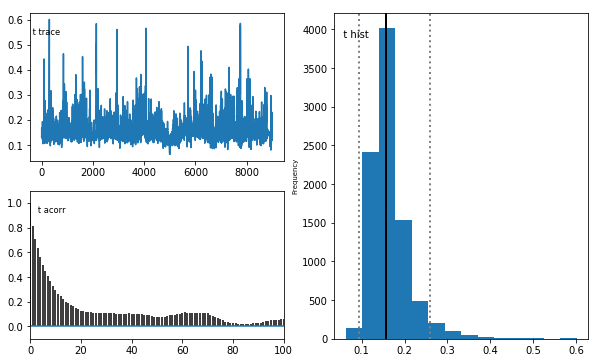

In [32]:
congrb_acc_z.plot_posteriors(['a', 't', 'v', 'a_std'])

# Stimulus coded models

## Stimulus coded bisensory flash response

In [145]:
congrf_stim = hddm.HDDMStimCoding(stim_congrf, include=['a', 'v', 't', 'z', 'p_outlier'], stim_col='stimCode')
congrf_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.


TypeError: __init__() got an unexpected keyword argument 'includes'

In [144]:
congrf_stim.print_stats()

         mean          std        2.5q         25q         50q         75q      97.5q       mc err
a     1.95213    0.0328303     1.88917     1.92999     1.95173     1.97397    2.01774  0.000372321
v    0.695306    0.0479959    0.602095    0.663251    0.695279      0.7276   0.789836  0.000507587
t  0.00132676  0.000320006  0.00100845  0.00109295  0.00122874  0.00145456  0.0021837  5.57305e-06
z    0.518299    0.0115807    0.494835    0.510626    0.518371    0.525945   0.541217  0.000118597
DIC: 1476.742654
deviance: 1473.747853
pD: 2.994801


Plotting a
Plotting v
Plotting t


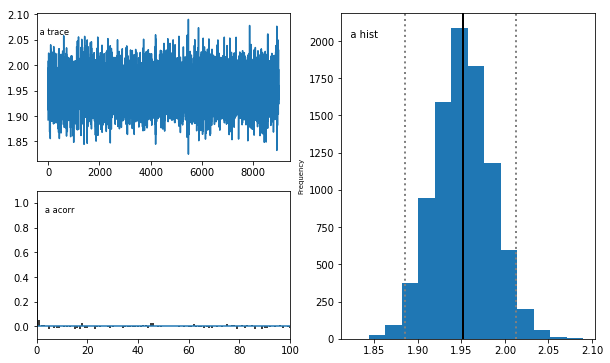

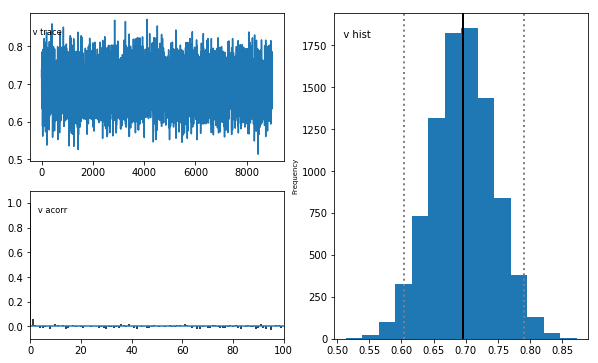

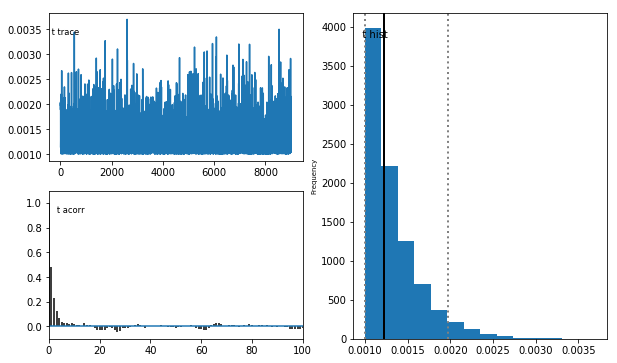

In [143]:
congrf_stim.plot_posteriors(['a', 't', 'v', 'a_std'])

In [137]:
congrb_stim = hddm.HDDMStimCoding(stim_congrb, include='z', stim_col='stimCode')
congrb_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 153.5 sec

In [138]:
congrb_stim.print_stats()

         mean          std        2.5q       25q         50q         75q       97.5q       mc err
a     1.86723    0.0311144     1.80858   1.84592     1.86668     1.88827     1.92977  0.000324159
v    0.731483    0.0493835    0.636275  0.697192    0.731385    0.764716    0.828102  0.000553866
t  0.00118863  0.000188736  0.00100469  0.001055  0.00113061  0.00126007  0.00169897  3.71461e-06
z    0.506822    0.0117629    0.483727  0.498898    0.506949     0.51466     0.52961  0.000134382
DIC: 1463.240114
deviance: 1460.185713
pD: 3.054401


Plotting a
Plotting v
Plotting t


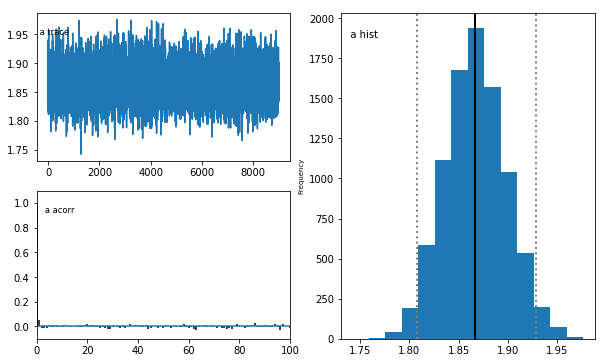

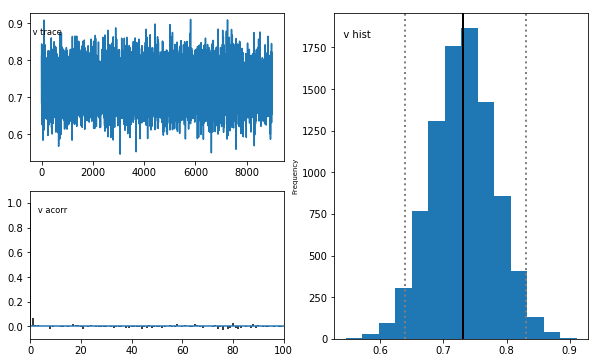

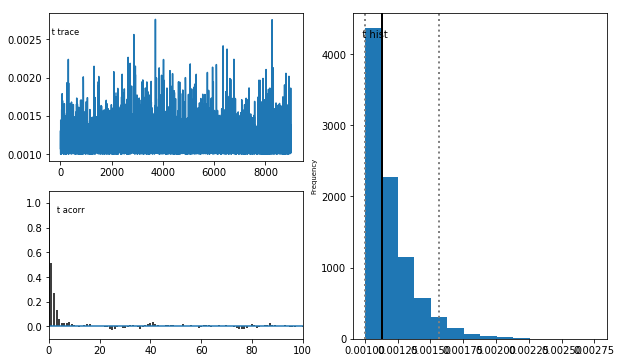

In [139]:
congrb_stim.plot_posteriors(['a', 't', 'v', 'a_std'])

In [20]:
unif_stim = hddm.HDDMStimCoding(stim_unif, include='z', stim_col='stimCode')
unif_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 85.7 sec

In [21]:
unif_stim.print_stats()

       mean         std      2.5q       25q       50q       75q     97.5q       mc err
a   1.43041   0.0516858   1.33245   1.39483   1.42927   1.46481   1.53327  0.000712142
v  0.876263    0.125332  0.631358  0.792342   0.87492  0.961757   1.12208   0.00153162
t  0.163515  0.00654315  0.149132  0.159501  0.164104   0.16819  0.174483  8.51351e-05
z  0.596882   0.0219815   0.55377  0.581714  0.597015  0.612364  0.639753  0.000280892
DIC: 219.737460
deviance: 215.740722
pD: 3.996738


Plotting a
Plotting v
Plotting t


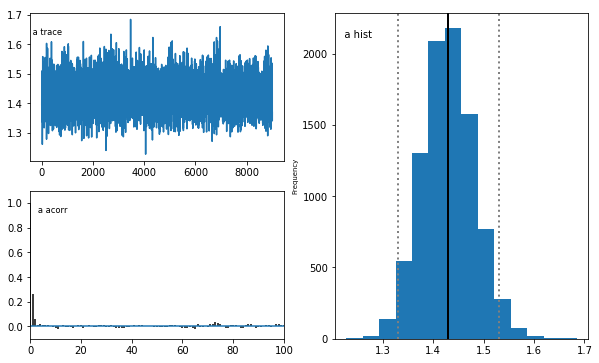

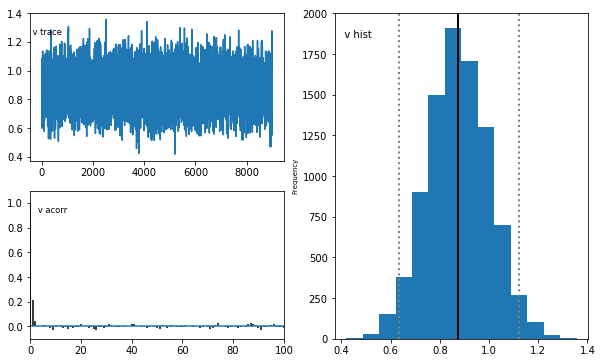

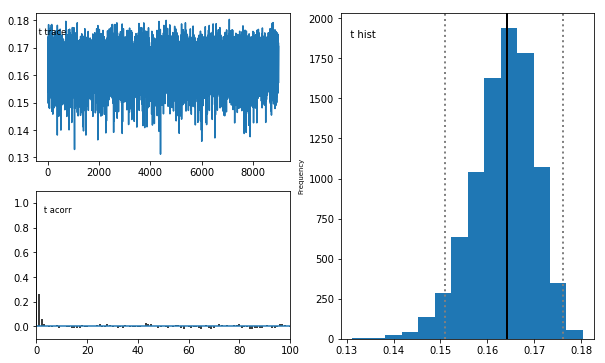

In [23]:
unif_stim.plot_posteriors(['a', 't', 'v', 'a_std'])

C:\Users\Edwin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


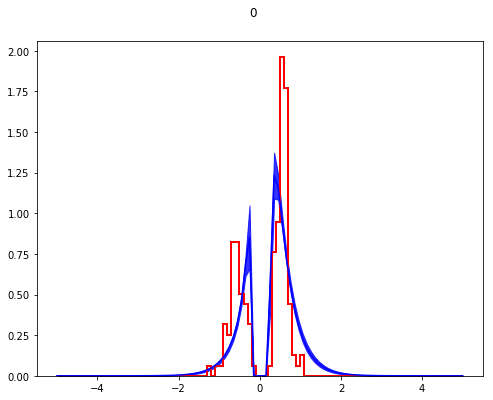

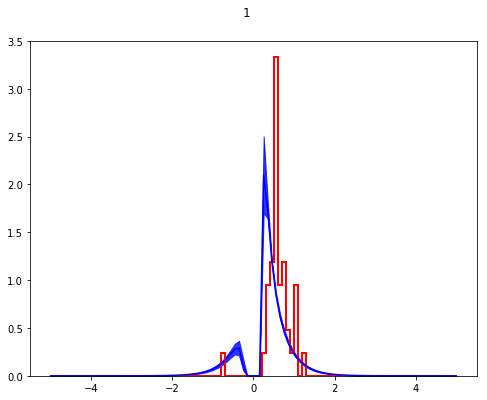

In [24]:
unif_stim.plot_posterior_predictive()

In [26]:
ppc = hddm.utils.post_pred_gen(unif_stim)
ppc_compare = hddm.utils.post_pred_stats(stim_unif, ppc)
print(ppc_compare)

 [---------------------------------------------250%----------------------------------------------] 5 of 2 complete in 79.8 sec          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.700000  0.766609  0.096375  0.004437  0.013725     True   
mean_ub   0.586900  0.603456  0.081848  0.000274  0.006973     True   
std_ub    0.174591  0.330939  0.058334  0.024445  0.027847    False   
10q_ub    0.393905  0.294564  0.041530  0.009869  0.011593    False   
30q_ub    0.504483  0.389596  0.063836  0.013199  0.017274    False   
50q_ub    0.558862  0.506533  0.083262  0.002738  0.009671     True   
70q_ub    0.645909  0.677891  0.108859  0.001023  0.012873     True   
90q_ub    0.786263  1.041511  0.165147  0.065152  0.092425     True   
mean_lb  -0.569826 -0.602263  0.132545  0.001052  0.018620     True   
std_lb    0.212453  0.299820  0.114009  0.007633  0.020631     True   
10q_lb    0.300201  0.

In [42]:
unib_stim = hddm.HDDMStimCoding(stim_unib, include='z', stim_col='stimCode')
unib_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 86.8 sec

In [43]:
unib_stim.print_stats()

       mean         std      2.5q       25q       50q       75q     97.5q       mc err
a   1.82732    0.100586   1.63969   1.75724   1.82374   1.89294   2.03428     0.002137
v   2.32366    0.162366    2.0034   2.21507   2.32295   2.43146   2.64074   0.00314926
t  0.161453  0.00710036  0.145272  0.157281   0.16214  0.166541  0.173357  0.000120264
z  0.495828   0.0178081  0.461136  0.483764  0.495767  0.507897  0.530267  0.000170915
DIC: -62.989592
deviance: -66.913471
pD: 3.923879


In [127]:
congrf_stim = hddm.HDDMStimCoding(stim_congrf, include='z', stim_col='stimCode')
congrf_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 178.9 sec

In [128]:
congrf_stim.print_stats()

         mean          std        2.5q         25q         50q         75q       97.5q       mc err
a     1.95165    0.0327008      1.8877     1.92989     1.95136     1.97399     2.01525   0.00040594
v    0.694747    0.0464806    0.603225    0.664236    0.694522    0.724932    0.787068  0.000496048
t  0.00132503  0.000325202  0.00100704  0.00109158  0.00122416  0.00145307  0.00218579  6.36046e-06
z    0.518097     0.011845    0.494959    0.510142    0.518149     0.52602    0.541601  9.91745e-05
DIC: 1476.672463
deviance: 1473.707396
pD: 2.965067


In [48]:
congrb_stim = hddm.HDDMStimCoding(stim_congrb, include='z', stim_col='stimCode')
congrb_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 87.0 sec

In [49]:
congrb_stim.print_stats()

        mean         std       2.5q        25q        50q        75q      97.5q       mc err
a    1.51786   0.0814799    1.36834    1.46094    1.51446    1.57169    1.68622   0.00186849
v       2.18    0.154001    1.88092    2.07343    2.18068    2.28342    2.48246   0.00240223
t  0.0404534  0.00809732  0.0234085  0.0352504  0.0410498  0.0461518  0.0547001  0.000162205
z   0.549728   0.0180053   0.514844    0.53752   0.549848   0.561684   0.585222  0.000186217
DIC: -79.030405
deviance: -82.944547
pD: 3.914142


In [26]:
test = hddm.HDDMStimCoding(stim_unib, include='z', stim_col='stimCode')
test.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [                  0%                  ] 51 of 10000 complete in 18.7 sec

AssertionError: Step-out procedure failed

In [25]:
test.print_stats()
#stim_unib.loc[stim_unib['subj_idx'] == 1]

                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a           1.397035  0.334928  0.899263  1.221644  1.328920  1.491715  2.317836  0.005444
a_std       0.491734  0.572812  0.011926  0.121453  0.285180  0.642957  2.127289  0.016009
a_subj.1.0  1.353475  0.093232  1.193388  1.286607  1.345449  1.412912  1.556461  0.002671
a_subj.2.0  1.233104  0.074343  1.092957  1.181490  1.229864  1.281001  1.384693  0.001932
v           0.078008  0.682908 -1.192398 -0.174302  0.011771  0.221357  1.829951  0.011327
v_std       0.684730  0.784348  0.017259  0.150981  0.381675  0.926860  2.884145  0.024584
v_subj.1.0 -0.003704  0.163953 -0.315862 -0.117286 -0.003318  0.105273  0.326134  0.002399
v_subj.2.0 -0.031610  0.167138 -0.373334 -0.141553 -0.029665  0.077439  0.293940  0.002509
t           0.337401  0.147229  0.158780  0.231127  0.297904  0.406769  0.706506  0.003830
t_std       0.300714  0.289000  0.032572  0.094203  0.206350  0.405711  1.066824  0.008065